In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv('./model_data/winni_reports.csv', index_col = 0)
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,False,6:20,9:00,lockes,160.0,8,6,"[5, 7)"
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,12.8,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,False,6:20,9:00,lockes,160.0,8,8,"[7, 9)"
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,False,7:15,10:30,diamond,195.0,8,7,"[7, 9)"


In [3]:
cols_b4_dummy = df[['wind_dir', 'weather', 'general_loc', 'fish_type']]

In [4]:
## Dummy columns
df_dummies = pd.get_dummies(df, columns = ['wind_dir', 'weather', 'general_loc', 'fish_type'], drop_first = True)

In [5]:
# Define X
X = X = df_dummies.drop(columns = ['date','fish_length_in', 'time_caught', 'lines_in', 'lines_out', 'location', 'time_caught_bucket'])

# Standard Scalar
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

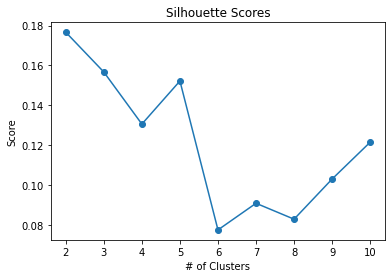

In [6]:
# plot silhouette scores

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

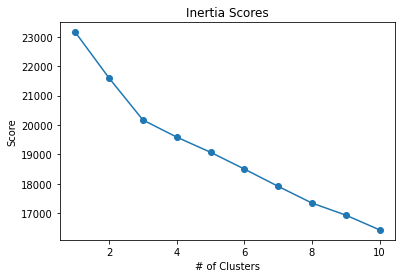

In [7]:
# Elbow plot

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

In [8]:
# Fit a K-means clustering model
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [9]:
df['cluster'] = km.labels_

In [10]:
df['cluster'] = df['cluster'].map({0: 'skunk', 1: 'late_season', 2: 'early_season'})

In [11]:
df['cluster'].value_counts()

late_season     320
skunk            71
early_season     63
Name: cluster, dtype: int64

In [12]:
cluster_df = df.groupby('cluster').mean().T

In [13]:
cluster_df

cluster,early_season,late_season,skunk
year,2016.904762,2016.468750,2017.394366
air_temp_f,52.573296,63.191153,60.490230
water_temp_f,49.158730,73.478097,65.375682
wind_speed_mph,2.873016,6.700000,5.957746
fish_length_in,17.974956,16.563437,0.000000
water_depth_ft,16.447676,32.865918,0.000000
skunked,0.000000,0.000000,1.000000
duration_min,222.857143,172.937500,128.957746
month,4.650794,7.734375,6.549296
hour,9.857143,8.059375,0.000000


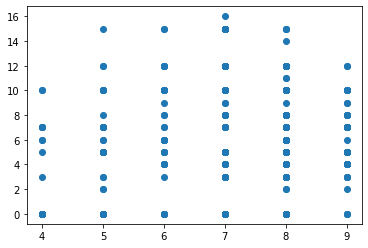

In [14]:
plt.scatter(x = df['month'], y = df['wind_speed_mph']);

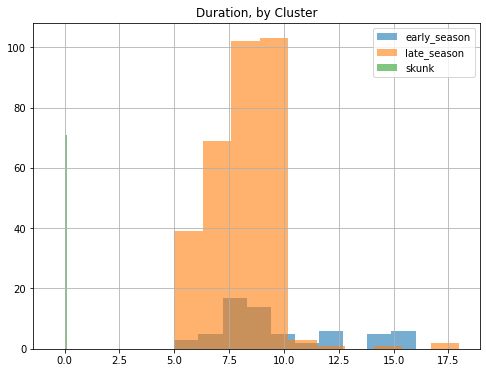

In [15]:
plt.figure(figsize=(8,6))
df.groupby('cluster')['hour'].hist(legend = True, alpha = .6)
plt.title('Duration, by Cluster')
plt.legend();

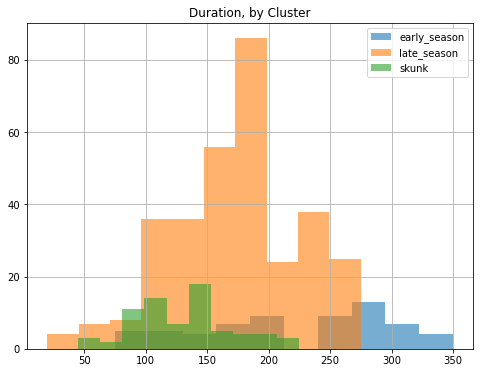

In [16]:
plt.figure(figsize=(8,6))
df.groupby('cluster')['duration_min'].hist(legend = True, alpha = .6)
plt.title('Duration, by Cluster')
plt.legend();

Text(0, 0.5, 'air temp')

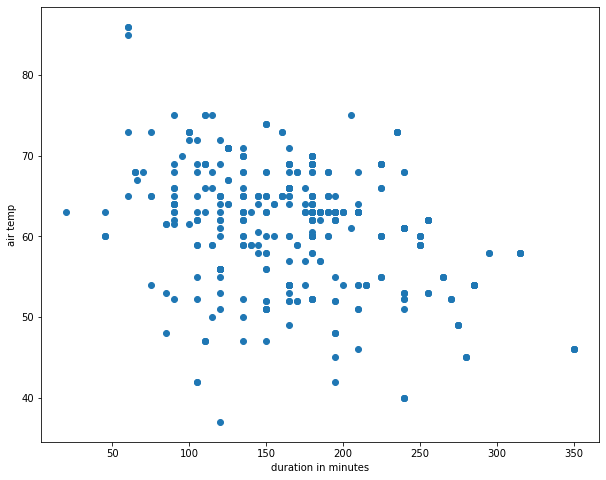

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
x = df['duration_min']
y = df['air_temp_f']
ax.scatter(x, y)
plt.xlabel('duration in minutes')
plt.ylabel('air temp')

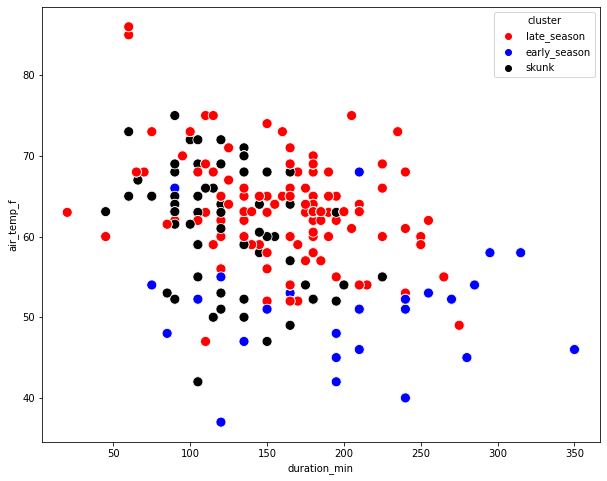

In [18]:
color_dict = dict({'skunk':'black',
                  'late_season':'red',
                  'early_season': 'blue',
                  })
plt.figure(figsize = (10,8))
sns.scatterplot(data = df, x = 'duration_min', y ='air_temp_f', hue = 'cluster', s = 100, palette = color_dict);

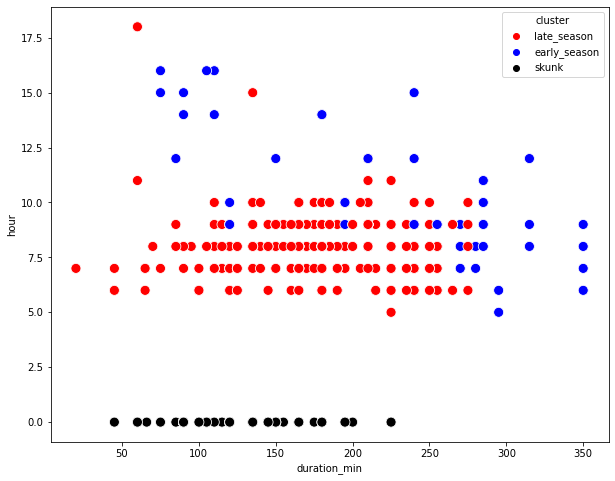

In [19]:
color_dict = dict({'skunk':'black',
                  'late_season':'red',
                  'early_season': 'blue',
                  })
plt.figure(figsize = (10,8))
sns.scatterplot(data = df, x = 'duration_min', y ='hour', hue = 'cluster', s = 100, palette = color_dict);

In [20]:
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket,cluster
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,False,6:20,9:00,lockes,160.0,8,6,"[5, 7)",late_season
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)",late_season
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,12.8,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)",late_season
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,False,6:20,9:00,lockes,160.0,8,8,"[7, 9)",late_season
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,False,7:15,10:30,diamond,195.0,8,7,"[7, 9)",late_season


In [21]:
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket,cluster
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,False,6:20,9:00,lockes,160.0,8,6,"[5, 7)",late_season
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)",late_season
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,12.8,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)",late_season
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,False,6:20,9:00,lockes,160.0,8,8,"[7, 9)",late_season
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,False,7:15,10:30,diamond,195.0,8,7,"[7, 9)",late_season


In [22]:
df_dummies.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,location,time_caught,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration_min,month,hour,time_caught_bucket,wind_dir_ene,wind_dir_n,wind_dir_ne,wind_dir_no_wind,wind_dir_nw,wind_dir_s,wind_dir_se,wind_dir_sw,wind_dir_w,weather_hazy,weather_no_weather_recorded,weather_overcast,weather_raining,weather_sunny,weather_windy,general_loc_alton bay,general_loc_birch,general_loc_carr point,general_loc_diamond,general_loc_governors,general_loc_harilla bay,general_loc_little bear bay,general_loc_lockes,general_loc_long island,general_loc_rattlesnake,general_loc_sandy,general_loc_saunders bay,general_loc_spindle point,general_loc_timber,general_loc_tip witches,general_loc_varney,general_loc_varney point,general_loc_weirs marina,general_loc_welch,general_loc_witches,general_loc_wolfboro bay,fish_type_lake trout,fish_type_no_fish_caught,fish_type_rainbow,fish_type_salmon,fish_type_smallmouth,fish_type_white perch
0,2015,2015-08-27,65.0,76.3,8,north of lockes,6:20,18.0,20.0,False,6:20,9:00,160.0,8,6,"[5, 7)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2015,2015-08-27,65.0,76.3,8,north of lockes,7:00,16.0,20.0,False,6:20,9:00,160.0,8,7,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2015,2015-08-27,65.0,76.3,8,north of lockes,7:15,12.8,20.0,False,6:20,9:00,160.0,8,7,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2015,2015-08-27,65.0,76.3,8,north of lockes,8:40,10.0,37.0,False,6:20,9:00,160.0,8,8,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2015,2015-08-28,65.0,76.3,8,north of diamond,7:45,16.0,43.0,False,7:15,10:30,195.0,8,7,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
print(f'cols_b4_dummy shape is {cols_b4_dummy.shape}')
print(f'df_dummies shape is {df_dummies.shape}')

cols_b4_dummy shape is (454, 4)
df_dummies shape is (454, 58)


In [24]:
# another way might be to save off the 4 original columns that get dummied (['wind_dir', 'weather', 'general_loc', 'fish_type'])
# and then merge those 4 columns to df_dummies

df_merged = pd.concat([cols_b4_dummy, df_dummies], axis = 1)
df_merged.head()
print(f'df_merged shape is {df_merged.shape}')

df_merged shape is (454, 62)


In [25]:
df_merged['cluster'] = km.labels_

In [26]:
df_merged['cluster'] = df_merged['cluster'].map({0: 'skunk', 1: 'late_season', 2: 'early_season'})

In [27]:
df_merged.head()

,wind_dir,weather,general_loc,fish_type,year,date,air_temp_f,water_temp_f,wind_speed_mph,location,time_caught,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration_min,month,hour,time_caught_bucket,wind_dir_ene,wind_dir_n,wind_dir_ne,wind_dir_no_wind,wind_dir_nw,wind_dir_s,wind_dir_se,wind_dir_sw,wind_dir_w,weather_hazy,weather_no_weather_recorded,weather_overcast,weather_raining,weather_sunny,weather_windy,general_loc_alton bay,general_loc_birch,general_loc_carr point,general_loc_diamond,general_loc_governors,general_loc_harilla bay,general_loc_little bear bay,general_loc_lockes,general_loc_long island,general_loc_rattlesnake,general_loc_sandy,general_loc_saunders bay,general_loc_spindle point,general_loc_timber,general_loc_tip witches,general_loc_varney,general_loc_varney point,general_loc_weirs marina,general_loc_welch,general_loc_witches,general_loc_wolfboro bay,fish_type_lake trout,fish_type_no_fish_caught,fish_type_rainbow,fish_type_salmon,fish_type_smallmouth,fish_type_white perch,cluster
0,nw,sunny,lockes,salmon,2015,2015-08-27,65.0,76.3,8,north of lockes,6:20,18.0,20.0,False,6:20,9:00,160.0,8,6,"[5, 7)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,late_season
1,nw,sunny,lockes,rainbow,2015,2015-08-27,65.0,76.3,8,north of lockes,7:00,16.0,20.0,False,6:20,9:00,160.0,8,7,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,late_season
2,nw,sunny,lockes,smallmouth,2015,2015-08-27,65.0,76.3,8,north of lockes,7:15,12.8,20.0,False,6:20,9:00,160.0,8,7,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,late_season
3,nw,sunny,lockes,salmon,2015,2015-08-27,65.0,76.3,8,north of lockes,8:40,10.0,37.0,False,6:20,9:00,160.0,8,8,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,late_season
4,nw,sunny,diamond,rainbow,2015,2015-08-28,65.0,76.3,8,north of diamond,7:45,16.0,43.0,False,7:15,10:30,195.0,8,7,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,late_season


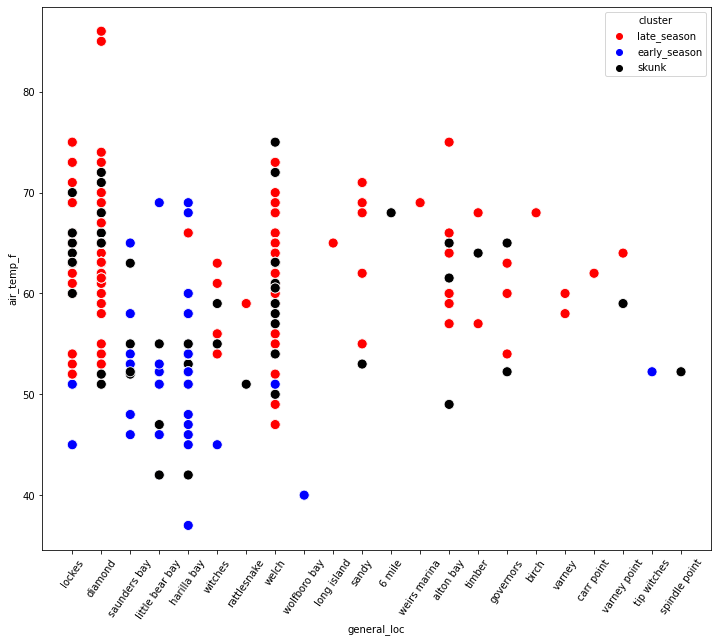

In [28]:
color_dict = dict({'skunk':'black',
                  'late_season':'red',
                  'early_season': 'blue',
                  })
plt.figure(figsize = (12,10))
sns.scatterplot(data = df_merged, x = 'general_loc', y ='air_temp_f', hue = 'cluster', s = 100, palette = color_dict)
plt.xticks(rotation=55);

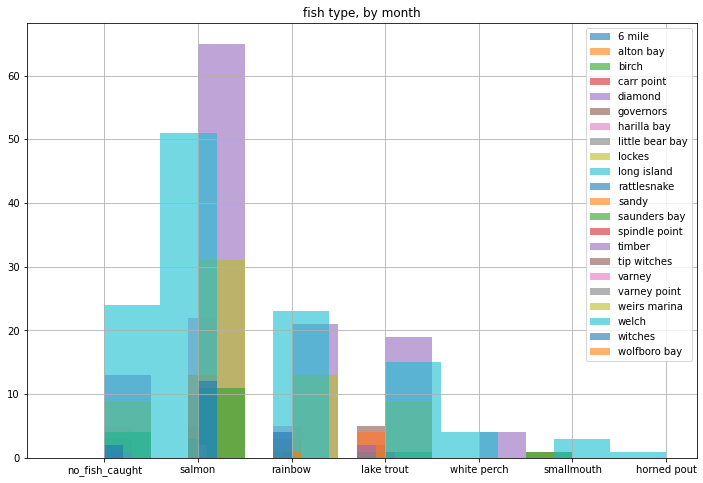

In [29]:
plt.figure(figsize=(12,8))
df_merged.groupby('general_loc')['fish_type'].hist(legend = True, alpha = .6)
plt.title('fish type, by month')
plt.legend();

In [30]:
df_merged.columns

Index(['wind_dir', 'weather', 'general_loc', 'fish_type', 'year', 'date',
       'air_temp_f', 'water_temp_f', 'wind_speed_mph', 'location',
       'time_caught', 'fish_length_in', 'water_depth_ft', 'skunked',
       'lines_in', 'lines_out', 'duration_min', 'month', 'hour',
       'time_caught_bucket', 'wind_dir_ene', 'wind_dir_n', 'wind_dir_ne',
       'wind_dir_no_wind', 'wind_dir_nw', 'wind_dir_s', 'wind_dir_se',
       'wind_dir_sw', 'wind_dir_w', 'weather_hazy',
       'weather_no_weather_recorded', 'weather_overcast', 'weather_raining',
       'weather_sunny', 'weather_windy', 'general_loc_alton bay',
       'general_loc_birch', 'general_loc_carr point', 'general_loc_diamond',
       'general_loc_governors', 'general_loc_harilla bay',
       'general_loc_little bear bay', 'general_loc_lockes',
       'general_loc_long island', 'general_loc_rattlesnake',
       'general_loc_sandy', 'general_loc_saunders bay',
       'general_loc_spindle point', 'general_loc_timber',
       'genera

In [31]:
df_merged.head()

,wind_dir,weather,general_loc,fish_type,year,date,air_temp_f,water_temp_f,wind_speed_mph,location,time_caught,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration_min,month,hour,time_caught_bucket,wind_dir_ene,wind_dir_n,wind_dir_ne,wind_dir_no_wind,wind_dir_nw,wind_dir_s,wind_dir_se,wind_dir_sw,wind_dir_w,weather_hazy,weather_no_weather_recorded,weather_overcast,weather_raining,weather_sunny,weather_windy,general_loc_alton bay,general_loc_birch,general_loc_carr point,general_loc_diamond,general_loc_governors,general_loc_harilla bay,general_loc_little bear bay,general_loc_lockes,general_loc_long island,general_loc_rattlesnake,general_loc_sandy,general_loc_saunders bay,general_loc_spindle point,general_loc_timber,general_loc_tip witches,general_loc_varney,general_loc_varney point,general_loc_weirs marina,general_loc_welch,general_loc_witches,general_loc_wolfboro bay,fish_type_lake trout,fish_type_no_fish_caught,fish_type_rainbow,fish_type_salmon,fish_type_smallmouth,fish_type_white perch,cluster
0,nw,sunny,lockes,salmon,2015,2015-08-27,65.0,76.3,8,north of lockes,6:20,18.0,20.0,False,6:20,9:00,160.0,8,6,"[5, 7)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,late_season
1,nw,sunny,lockes,rainbow,2015,2015-08-27,65.0,76.3,8,north of lockes,7:00,16.0,20.0,False,6:20,9:00,160.0,8,7,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,late_season
2,nw,sunny,lockes,smallmouth,2015,2015-08-27,65.0,76.3,8,north of lockes,7:15,12.8,20.0,False,6:20,9:00,160.0,8,7,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,late_season
3,nw,sunny,lockes,salmon,2015,2015-08-27,65.0,76.3,8,north of lockes,8:40,10.0,37.0,False,6:20,9:00,160.0,8,8,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,late_season
4,nw,sunny,diamond,rainbow,2015,2015-08-28,65.0,76.3,8,north of diamond,7:45,16.0,43.0,False,7:15,10:30,195.0,8,7,"[7, 9)",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,late_season


In [32]:
location = 'east of welch'
x = df.loc[df['location'].str.contains(f'{location}', case=False)].value_counts(['fish_type'], normalize=True).to_frame()
x.rename(columns = {0: 'Percent_Caught'}, inplace = True)
x.reset_index(inplace = True)

x['fish_type'] = x['fish_type'].map(lambda x: x.title())
x.set_index('fish_type', inplace = True)
x

,Percent_Caught
fish_type,
Salmon,0.35
Rainbow,0.30
No_Fish_Caught,0.20
Lake Trout,0.05
Smallmouth,0.05
White Perch,0.05


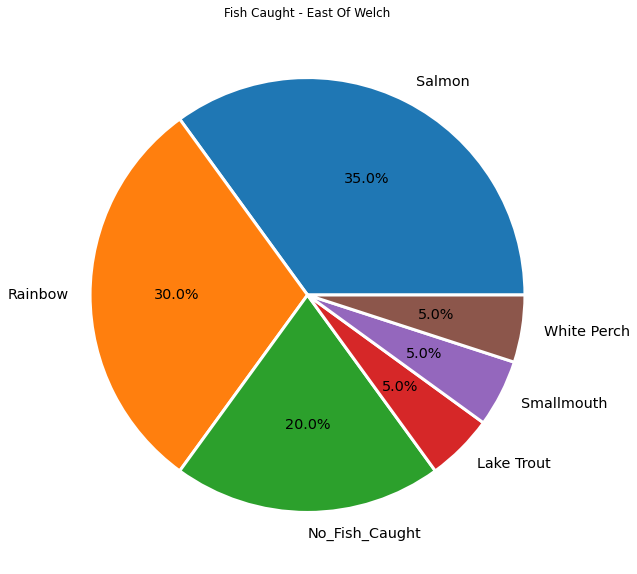

In [33]:
plot = x.plot.pie(y=0, 
                  figsize=(12, 10), 
                  autopct='%1.1f%%', 
                  textprops = {'size': 'x-large'},
                  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                  legend = False, 
                  normalize=False, 
                  title = f'Fish Caught - {location.title()}')
plt.ylabel('');

In [34]:
location = 'north of lockes'
weather = 'sunny'
x = df.loc[(df['location'] == location) & (df['weather'] == weather)].value_counts(['fish_type'], normalize=True).to_frame()
x.rename(columns = {0: 'Percent_Caught'}, inplace = True)
x.reset_index(inplace = True)
x['fish_type'] = x['fish_type'].map(lambda x: x.title())
x.set_index('fish_type', inplace = True)
x

,Percent_Caught
fish_type,
Salmon,0.476190
Rainbow,0.285714
Lake Trout,0.095238
No_Fish_Caught,0.095238
Smallmouth,0.047619


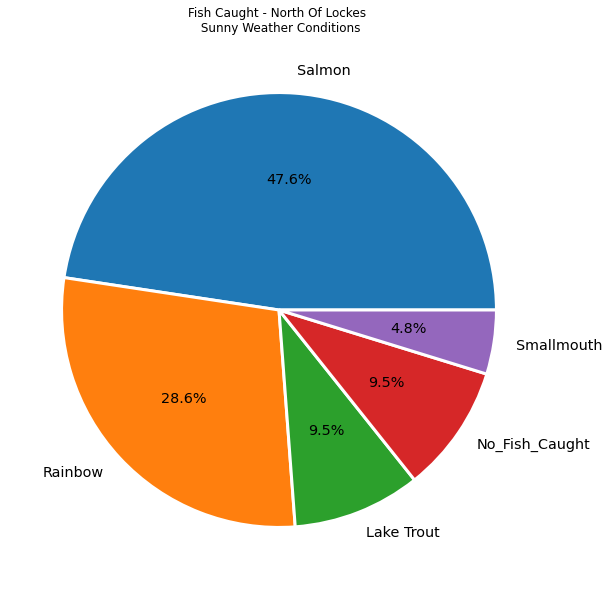

In [35]:
plot = x.plot.pie(y=0, 
                  figsize=(12, 10), 
                  autopct='%1.1f%%', 
                  textprops = {'size': 'x-large'},
                  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                  legend = False, 
                  normalize=False, 
                  title = f'Fish Caught - {location.title()} \n {weather.title()} Weather Conditions')
plt.ylabel('');